In [4]:
import Pkg
Pkg.add("FFTW")
Pkg.add("PyPlot")
Pkg.add("Trapz")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("DelimitedFiles")
Pkg.add("SpecialFunctions")
using FFTW
using PyPlot
using Trapz
using CSV
using DataFrames
using SpecialFunctions

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = SMALL_SIZE         # controls default text sizes
rcParams["axes.titlesize"] = SMALL_SIZE    # fontsize of the axes title
rcParams["axes.labelsize"] = MEDIUM_SIZE   # fontsize of the x and y labels
rcParams["xtick.labelsize"] = SMALL_SIZE    # fontsize of the tick labels
rcParams["ytick.labelsize"] = SMALL_SIZE    # fontsize of the tick labels
rcParams["legend.fontsize"] = SMALL_SIZE   # legend fontsize
rcParams["figure.titlesize"] = BIGGER_SIZE  # fontsize of the figure title

20

In [6]:
k_limit = 200
steps = 16386
d = k_limit/(steps-1)
k = LinRange(0,k_limit,steps)
f_real = cosint.(k) .- Base.MathConstants.eulergamma .- log.(k)
f_imag = sinint.(k)
freq = fftfreq(32768,1/d)*2*π

32768-element Frequencies{Float64}:
  0.0
  0.015708922005941393
  0.03141784401188279
  0.04712676601782418
  0.06283568802376557
  0.07854461002970697
  0.09425353203564836
  0.10996245404158975
  0.12567137604753115
  0.14138029805347255
  0.15708922005941395
  0.17279814206535532
  0.18850706407129672
  ⋮
 -0.18850706407129672
 -0.17279814206535532
 -0.15708922005941395
 -0.14138029805347255
 -0.12567137604753115
 -0.10996245404158975
 -0.09425353203564836
 -0.07854461002970697
 -0.06283568802376557
 -0.04712676601782418
 -0.03141784401188279
 -0.015708922005941393

In [8]:
prefactor = 1/sqrt(π)
er = exp.(prefactor*f_real)
ei1 = cos.(prefactor .* f_imag)
ei2 = sin.(prefactor .* f_imag)

er[1]=1
fc1 = er .* ei1 + im * (er .* ei2)
fc2 = conj.(fc1)

fc = fc1[1:end-1]
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[1]=1
fc[end]=real(fc[end])

fc_t = [fc; reverse(conj.(fc))[2:end-1]]
println(fc_t[16385])
p = fft(fc_t)
normfact = sum(p[1:16385])
p = p/normfact/freq[2]

0.022958513282837857 + 0.0im


32768-element Vector{ComplexF64}:
   3.3398910230285472 + 3.933116832030844e-17im
   3.3850905489061285 + 4.904791111841323e-17im
   1.7601955698771814 + 2.7525780444979235e-17im
   1.9209616071944466 + 9.472799823487807e-17im
   1.3750803616333216 + 5.3228989608116176e-17im
    1.496810154305407 + 1.0516550026716941e-16im
   1.1782326568540882 + 6.80206656355655e-17im
    1.274756786307061 - 1.172914729922534e-17im
   1.0525153972981292 + 1.1876279748354401e-17im
   1.1324839595251814 + 3.723136088600162e-17im
   0.9628954691661272 + 5.367252609925057e-17im
    1.031243241966499 - 8.031443433421115e-18im
   0.8946391420599802 + 1.1154798446846463e-17im
                      ⋮
  0.04667002445106658 - 2.4963808090138586e-17im
 -0.05085203958642122 - 7.598031254366146e-19im
  0.05585610432549733 + 3.35612817795994e-17im
 -0.06195068341224965 + 2.115584875228739e-17im
  0.06953523609765129 - 1.0199799871922517e-17im
 -0.07923105886595125 + 4.090749064421773e-17im
  0.09205971847224097 - 3

In [205]:
using DelimitedFiles
int1 = reshape(readdlm("1.csv"),:,1)

1000000×1 Matrix{Float64}:
 2.311944020782986
 0.5312691190972895
 0.0796586573352189
 3.1837185426304453
 0.2720605927390038
 0.7517569445608814
 0.3630742978211649
 3.7839996699396035
 1.1074663977262675
 0.9016754159041069
 1.1587390457272213
 0.9788032517905035
 0.49719657687783386
 ⋮
 1.106062794542701
 0.013330907992265115
 0.9510984577836002
 0.13656871562081319
 1.2932475475409488
 1.0857378822123702
 0.7274602810827668
 1.5613710860952246
 0.04426827049828441
 0.4337663482097179
 1.082471887909823
 0.38548579030943997

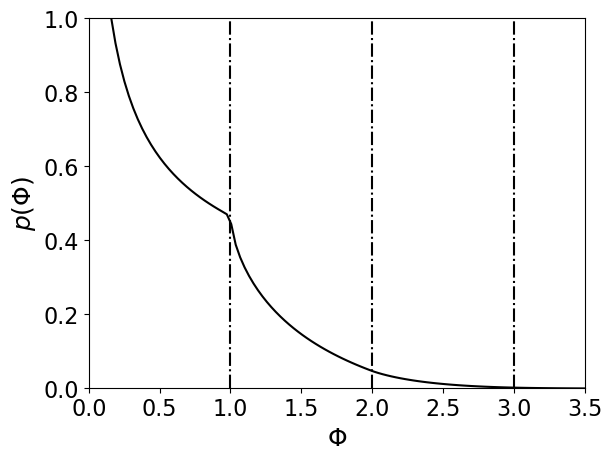

In [9]:
freq_limit = 16000
using PyPlot
plot(freq[1:2:freq_limit],real.(p[1:2:freq_limit])/0.96,color="k")
#hist(int1,bins=500,density=true,color="gray")
xlabel(L"$\Phi$")
ylabel(L"$p(\Phi)$")
xlim((0,3.5))
ylim((0,1))
axvline(x=1,linestyle="-.",color="k")
axvline(x=2,linestyle="-.",color="k")
axvline(x=3,linestyle="-.",color="k")
savefig("oned_1_int.png",format="png",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")

In [10]:
trapz(freq[1:16385],p[1:16385])

0.9737656181409632 - 1.6161251879968529e-16im

In [221]:
prefactor = 2/sqrt(π)
er = exp.(prefactor*f_real)
ei1 = cos.(prefactor .* f_imag)
ei2 = sin.(prefactor .* f_imag)

er[1]=1
fc1 = er .* ei1 + im * (er .* ei2)
fc2 = conj.(fc1)
ratio = 1
fc = (ratio*fc1[1:end-1] .+ (1-ratio)*fc2[2:end])
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[1]=1
fc[end]=real(fc[end])

fc_t = [fc; reverse(conj.(fc))[2:end-1]]
println(length(fc_t))
p = fft(fc_t)
normfact = sum(p[1:16385])
p = p/normfact/freq[2]

32768


32768-element Vector{ComplexF64}:
    0.3793401827638722 - 2.3960850176904595e-18im
    0.3405806018133603 + 1.2084696786273756e-18im
    0.1915712317671922 + 2.7149504139720745e-18im
   0.21579899472726263 + 6.099717846737712e-18im
    0.1678116809728528 - 7.626628962650193e-18im
   0.18530150840718174 + 1.5925670561464096e-17im
   0.15797031005244885 + 1.3521789793921761e-17im
   0.17184901171564346 - 1.1295769208388761e-17im
   0.15320625730433982 + 2.2345515510361927e-19im
    0.1648864270793516 + 5.3984341665457195e-18im
    0.1509864466329712 + 1.0590703726378162e-17im
   0.16120148783036706 + 8.386252408363983e-18im
   0.15028025352292998 - 1.1580039002381002e-17im
                       ⋮
  0.004481743769469976 - 1.4088168103805287e-17im
 -0.004868856303112247 + 3.7344714818140785e-19im
  0.005386279232397626 + 1.0427990841579436e-18im
  -0.00596121376381248 + 6.535354433999386e-18im
  0.006735037480846282 - 1.646358870315905e-18im
 -0.007664703340810472 + 8.376121709961224e-18

In [199]:
using DelimitedFiles
int2 = reshape(readdlm("2.csv"),:,1)

1000000×1 Matrix{Float64}:
 1.3381259288081346
 6.290797178820789
 3.56398448719074
 3.1696607910304606
 2.0759297333921425
 1.6396614348568412
 2.294717551806449
 2.919720885127858
 1.393871020410217
 1.2756593637701996
 4.273135812570397
 1.347316869606751
 1.4510130501377005
 ⋮
 1.287995500826711
 1.4659175623476817
 1.2865725813976663
 3.0232990869117264
 0.937331811566319
 0.002821522754721894
 3.041633488903981
 0.957503379619532
 4.112032570656697
 1.0568006923548705
 0.15875962687693457
 0.7642116866241998

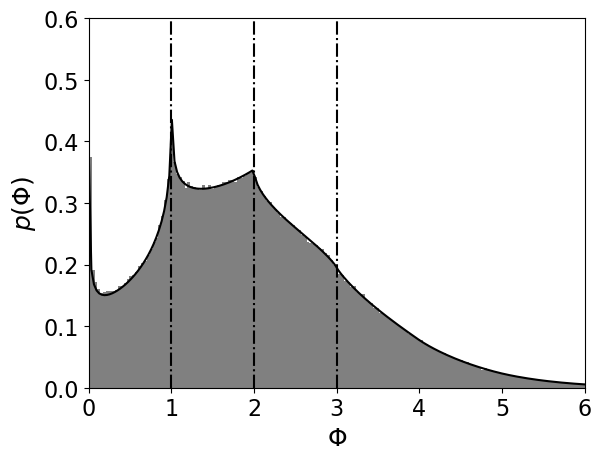

In [222]:
freq_limit = 16000
using PyPlot
plot(freq[1:2:freq_limit],real.(p[1:2:freq_limit]),color="k")
hist(int2,bins=300,density=true,color="gray")
xlabel(L"$\Phi$")
ylabel(L"$p(\Phi)$")
xlim((0,6))
ylim((0,.6))
axvline(x=1,linestyle="-.",color="k")
axvline(x=2,linestyle="-.",color="k")
axvline(x=3,linestyle="-.",color="k")
savefig("oned_2_int.png",format="png",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")

In [146]:
trapz(freq[1:2:freq_limit],p[1:2:freq_limit])

0.9897534045016856 + 1.9334260672454903e-17im

In [233]:
prefactor = 5/sqrt(π)
er = exp.(prefactor*f_real)
ei1 = cos.(prefactor .* f_imag)
ei2 = sin.(prefactor .* f_imag)

er[1]=1
fc1 = er .* ei1 + im * (er .* ei2)
fc2 = conj.(fc1)
ratio = 0.7
fc = (ratio*fc1[1:end-1] .+ (1-ratio)*fc2[2:end])
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[1]=1
fc[end]=real(fc[end])

fc_t = [fc; reverse(conj.(fc))[2:end-1]]
println(length(fc_t))
p = fft(fc_t)
normfact = sum(p[1:16385])
p = p/normfact/freq[2]

32768


32768-element Vector{ComplexF64}:
  -0.0015344486605234423 - 9.10100431872559e-21im
  -0.0013389563145226855 + 1.5187295984267226e-18im
  -0.0012371729100406305 + 1.4888989550649815e-18im
  -0.0011244672898117372 - 2.468424021755627e-18im
   -0.001030895473432446 - 1.0186078247537306e-17im
   -0.000927278305170555 - 6.949346555209238e-19im
  -0.0008333567094637594 + 1.693055546336062e-19im
  -0.0007309573243508667 + 5.258605515982157e-19im
  -0.0006344168995897483 + 1.7062355962430198e-19im
  -0.0005304013817305379 + 2.170654314314208e-18im
 -0.00043013708342236085 - 1.424804960267261e-18im
  -0.0003230441398933899 + 4.896168383646958e-18im
 -0.00021834320894530653 - 1.701706419800671e-18im
                         ⋮
  -0.0011828606007217716 - 5.139746543872437e-18im
  -0.0012210104985357362 + 1.232470108589381e-18im
  -0.0012536604802193794 + 3.2502499495800383e-19im
  -0.0012906834020584373 + 1.863968519830807e-18im
  -0.0013212836553209073 - 1.4378167314421873e-18im
  -0.00135784563

In [178]:
using DelimitedFiles
int5 = reshape(readdlm("5.csv"),:,1)

1000000×1 Matrix{Float64}:
 8.776102014025163
 5.156432753734212
 5.342393385800507
 4.1370894339861355
 2.2200375959568492
 3.9245326744830775
 6.655379386213036
 5.916319359209322
 5.693795531302777
 4.841063255081732
 0.9856789994426911
 7.161654231085948
 3.072416462922466
 ⋮
 5.774064117484938
 4.457576476678405
 4.931237751332169
 4.73128915644142
 8.669869356064416
 3.5883230084621607
 4.057546066251332
 6.805637141243625
 2.2851727416910155
 5.020849069532358
 6.184139951765326
 7.9906318692103335

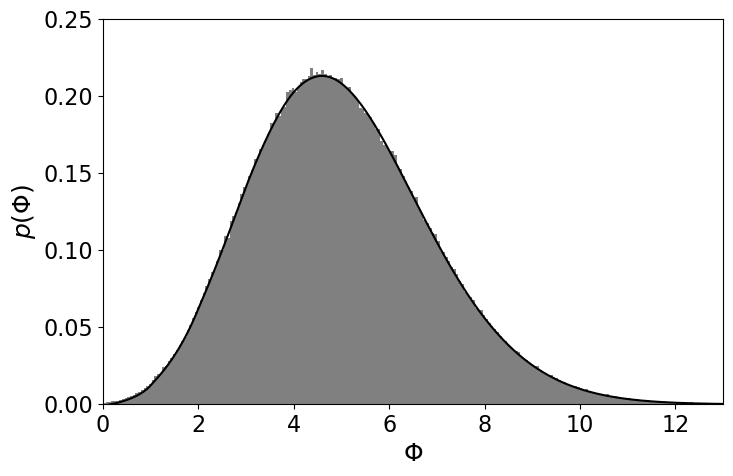

In [234]:
freq_limit = 1000
using PyPlot
figure(figsize=(8,5))
plot(freq[1:2:freq_limit],real.(p[1:2:freq_limit])*.97,color="k")
hist(int5,bins=300,density=true,color="gray")
xlabel(L"$\Phi$")
ylabel(L"$p(\Phi)$")
xlim((0,13))
ylim((0,0.25))
savefig("oned_5_int.png",format="png",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")

In [150]:
trapz(freq[1:2:16385],p[1:2:16385])

0.9988646761024347 - 2.9493656695380863e-16im

In [215]:
prefactor = 0.2/sqrt(π)
er = exp.(prefactor*f_real)
ei1 = cos.(prefactor .* f_imag)
ei2 = sin.(prefactor .* f_imag)

er[1]=1
fc1 = er .* ei1 + im * (er .* ei2)
fc2 = conj.(fc1)
ratio = 1
fc = (ratio*fc1[1:end-1] .+ (1-ratio)*fc2[2:end])
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[1]=1
fc[end]=real(fc[end])

fc_t = [fc; reverse(conj.(fc))[2:end-1]]
println(length(fc_t))
p = fft(fc_t)
normfact = sum(p[1:16385])
p = p/normfact/freq[2]

32768


32768-element Vector{ComplexF64}:
    38.34095549492815 - 2.8773430850047724e-16im
   3.1780731011009644 - 2.103965295418015e-17im
     0.77619273862426 - 5.056944349205456e-18im
   1.2084998472385138 + 3.2734103971741335e-17im
  0.49829054804820666 + 1.1986841985482133e-17im
   0.7929791118320433 + 4.9128191330914266e-17im
     0.38674615527787 + 1.5373926589461086e-17im
   0.6085028224647037 - 8.337759640046134e-18im
  0.32532308156088074 - 3.0836820602133996e-18im
   0.5034683573248543 + 6.174794477421832e-18im
   0.2861645593650131 + 1.211445954522277e-17im
  0.43550771227345336 - 1.7778814241892366e-17im
   0.2590093210755436 + 1.6961210719743296e-18im
                      ⋮
  0.06786332237696346 - 7.190403867682115e-18im
 -0.07407773347562874 - 2.8586190732480646e-18im
  0.08151951544964567 + 7.674864012330547e-18im
   -0.090577138982336 + 1.0963742347858951e-17im
  0.10185276268336696 - 7.797996816177405e-18im
 -0.11625589702893838 + 3.7291403887631013e-17im
  0.135308759102422

In [214]:
using DelimitedFiles
int02 = reshape(readdlm("02.csv"),:,1)

1000000×1 Matrix{Float64}:
 1.846474401997409e-11
 2.2136191495185906e-19
 9.304555397908731e-46
 0.0023473803189658087
 0.15169376023102515
 0.0009688176063369515
 0.641361556122713
 0.590062005763422
 1.225510014942492
 3.4062689892556037e-122
 0.8483006491828915
 2.617472429460784e-26
 0.8193737218301835
 ⋮
 0.0014173261695997815
 0.9965245085110559
 0.9875142991263943
 2.3438852526075903e-13
 0.33481851637888904
 0.0005242316521428347
 3.873904818653557e-6
 0.002162723513122407
 0.27132770659345345
 8.49351122324034e-44
 3.742245200624615e-73
 0.015276685924335074

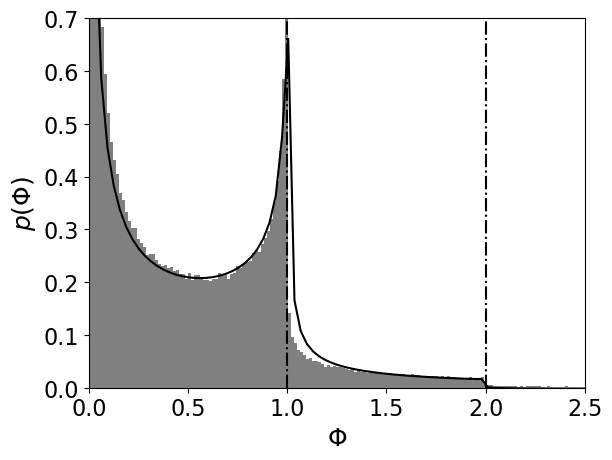

In [218]:
freq_limit = 1000
using PyPlot
plot(freq[1:2:freq_limit],real.(p[1:2:freq_limit]/0.85),color="k")
hist(int02,bins=300,density=true,color="gray")
xlabel(L"$\Phi$")
ylabel(L"$p(\Phi)$")
xlim((0,2.5))
ylim((0,0.7))
axvline(x=1,linestyle="-.",color="k")
axvline(x=2,linestyle="-.",color="k")
axvline(x=3,linestyle="-.",color="k")
savefig("oned_02_int.png",format="png",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")

In [153]:
trapz(freq[1:2:16385],p[1:2:16385])

0.8526227131741384 + 7.94603583334398e-16im

In [225]:
prefactor = 0.5/sqrt(π)
er = exp.(prefactor*f_real)
ei1 = cos.(prefactor .* f_imag)
ei2 = sin.(prefactor .* f_imag)

er[1]=1
fc1 = er .* ei1 + im * (er .* ei2)
fc2 = conj.(fc1)
ratio = 1
fc = (ratio*fc1[1:end-1] .+ (1-ratio)*fc2[2:end])
# make sure that p(x) is normalized and that the highest frequency
# has no imaginary part
fc[1]=1
fc[end]=real(fc[end])

fc_t = [fc; reverse(conj.(fc))[2:end-1]]
println(length(fc_t))
p = fft(fc_t)
normfact = sum(p[1:16385])
p = p/normfact/freq[2]

32768


32768-element Vector{ComplexF64}:
    18.00025456254727 - 9.7407077159038e-17im
    3.752421238644717 - 1.5237418486411636e-17im
   1.1053029092322708 - 1.550693204171887e-18im
   1.5452493809342207 + 4.895708788623294e-17im
   0.7516306441826722 + 1.745422102684903e-17im
   1.0581087624001224 + 6.741174224701426e-17im
   0.6040869826327288 + 2.843116291270449e-17im
   0.8371334069000939 - 1.4953973037588056e-17im
   0.5211334648245998 - 1.2577783909586547e-18im
   0.7096231242405099 + 9.210001855146817e-18im
  0.46758745389351486 + 2.075546873449692e-17im
   0.6264065724930723 - 2.3169036544858013e-17im
   0.4301911502077094 - 1.0964600004915306e-18im
                      ⋮
  0.07402716793938369 - 1.2735184168663637e-17im
 -0.08080393136473385 - 5.6654778606042894e-18im
  0.08893669076941388 + 1.1651114695095714e-17im
 -0.09881826084694517 + 1.2800865575720014e-17im
  0.11113889828541658 - 7.689458720231873e-18im
 -0.12685866728905296 + 4.509236031295016e-17im
  0.14767530951523675 +

In [226]:
using DelimitedFiles
int05 = reshape(readdlm("05.csv"),:,1)

1000000×1 Matrix{Float64}:
 0.023113133995405478
 1.1709971357753073
 0.001097767175538216
 0.44657028367148344
 0.9532941858315421
 0.0005696796351955523
 1.9906192188023847e-6
 0.001956033062806578
 0.9375937559564953
 0.12067458733747335
 0.587815003075005
 1.9418439352590702
 0.05594793299086601
 ⋮
 4.37195555498912e-5
 0.5197705606982701
 5.238929032422875e-5
 1.2105182078863855e-19
 0.0015619008656749475
 0.00024649021839163787
 0.30907100620793854
 0.684274427372559
 0.000135690604742652
 0.6831900551691241
 0.1928289814663777
 1.1019461675855404

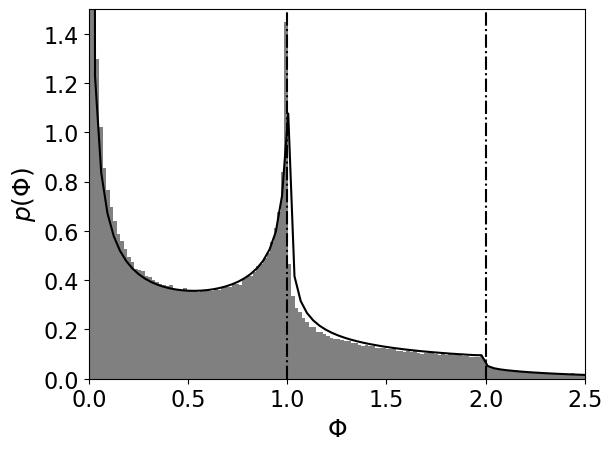

In [232]:
freq_limit = 1000
using PyPlot
plot(freq[1:2:freq_limit],real.(p[1:2:freq_limit]/0.9),color="k")
hist(int05,bins=300,density=true,color="gray")
xlabel(L"$\Phi$")
ylabel(L"$p(\Phi)$")
xlim((0,2.5))
ylim((0,1.5))
axvline(x=1,linestyle="-.",color="k")
axvline(x=2,linestyle="-.",color="k")
axvline(x=3,linestyle="-.",color="k")
savefig("oned_05_int.png",format="png",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")

In [228]:
trapz(freq[1:2:16385],p[1:2:16385])

0.8380934649013343 + 1.8946841849710475e-15im